# Kanerva's Table 7.3 (page 70)

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [2]:
bits = 1000
sample = 1000000
radius = 451
scanner_type = sdmlib.SDM_SCANNER_OPENCL

In [3]:
weight = [990, 980, 971, 962, 954, 947, 939, 932, 925, 918, 912, 905, 899, 893, 887, 881, 875, 869, 863, 857, 852, 846, 841, 835, 830, 825, 819, 814, 809, 804, 799, 794, 789, 784, 779, 775, 770, 765, 761, 756, 751, 747, 742, 738, 733, 729, 725, 720, 716, 712, 707, 703, 699, 695, 691, 687, 682, 678, 674, 670, 666, 662, 659, 655, 651, 647, 643, 639, 636, 632, 628, 624, 621, 617, 613, 610, 606, 603, 599, 595, 592, 588, 585, 581, 578, 575, 571, 568, 564, 561, 558, 554, 551, 548, 544, 541, 538, 535, 532, 528, 525, 522, 519, 516, 513, 510, 507, 503, 500, 497, 494, 491, 488, 485, 482, 479, 477, 474, 471, 468, 465, 462, 459, 456, 454, 451, 448, 445, 442, 440, 437, 434, 431, 429, 426, 423, 421, 418, 415, 413, 410, 408, 405, 402, 400, 397, 395, 392, 390, 387, 385, 382, 380, 377, 375, 372, 370, 367, 365, 363, 360, 358, 355, 353, 351, 348, 346, 344, 341, 339, 337, 335, 332, 330, 328, 326, 323, 321, 319, 317, 314, 312, 310, 308, 306, 304, 302, 299, 297, 295, 293, 291, 289, 287, 285, 283, 281, 279, 277, 275, 273, 271, 269, 267, 265, 263, 261, 259, 257, 255, 253, 251, 249, 247, 246, 244, 242, 240, 238, 236, 235, 233, 231, 229, 227, 225, 224, 222, 220, 218, 217, 215, 213, 211, 210, 208, 206, 205, 203, 201, 200, 198, 196, 195, 193, 191, 190, 188, 187, 185, 183, 182, 180, 179, 177, 176, 174, 173, 171, 170, 168, 167, 165, 164, 162, 161, 159, 158, 156, 155, 153, 152, 150, 149, 148, 146, 145, 143, 142, 141, 139, 138, 137, 135, 134, 133, 131, 130, 129, 127, 126, 125, 124, 122, 121, 120, 118, 117, 116, 115, 114, 112, 111, 110, 109, 108, 106, 105, 104, 103, 102, 101, 99, 98, 97, 96, 95, 94, 93, 92, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 64, 63, 62, 61, 60, 59, 58, 57, 56, 56, 55, 54, 53, 52, 51, 51, 50, 49, 48, 47, 47, 46, 45, 44, 43, 43, 42, 41, 40, 40, 39, 38, 38, 37, 36, 35, 35, 34, 33, 33, 32, 31, 31, 30, 29, 29, 28, 28, 27, 26, 26, 25, 25, 24, 23, 23, 22, 22, 21, 21, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13, 13, 12, 12, 11, 11, 10, 10, 10, 9, 9, 8, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2]
weight += [0]*(bits+1 - len(weight))

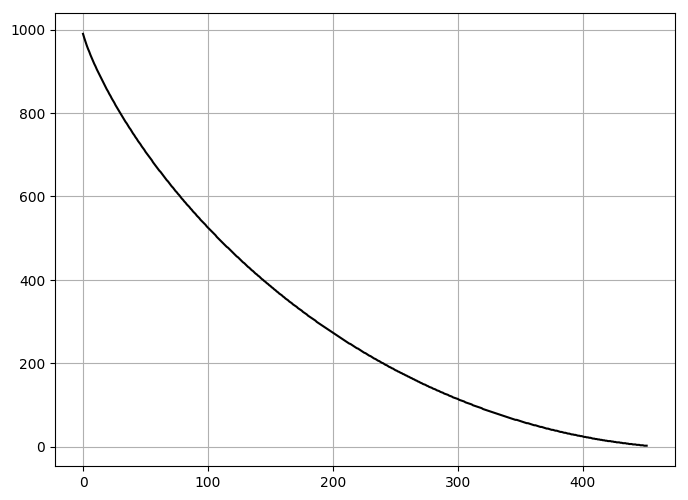

In [4]:
plt.figure(figsize=(8, 6), dpi=100)
#plt.plot(range(425, radius+1), weight[425:radius+1], 'k')
plt.plot(range(0, radius+1), weight[0:radius+1], 'k')
plt.grid()
plt.show()

In [5]:
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [6]:
for i in range(10000):
    clear_output(wait=True)
    print i
    bs = sdmlib.Bitstring.init_random(1000)
    sdm.write(bs, bs)#, weight=weight)

9999


In [7]:
b = sdmlib.Bitstring.init_random(1000)
sdm.write(b, b, weight=weight)

In [8]:
from IPython.display import clear_output

samples = 1

distances = []
x = range(0, 500)
#x = range(200, 220)
for i, dist in enumerate(x):
    clear_output(wait=True)
    print 'Distance: {:4d} ({:.2f}%)'.format(dist, 100.*(i+1)/len(x))
    v = []
    for j in range(samples):
        c = sdmlib.Bitstring.init_from_bitstring(b)
        c.flip_random_bits(dist)
        assert c.distance_to(b) == dist
        d = sdm.iter_read(c, max_iter=15)
        v.append(d.distance_to(b))
    distances.append(1.0*sum(v)/len(v))
print 'Done!'

Distance:  499 (100.00%)
Done!


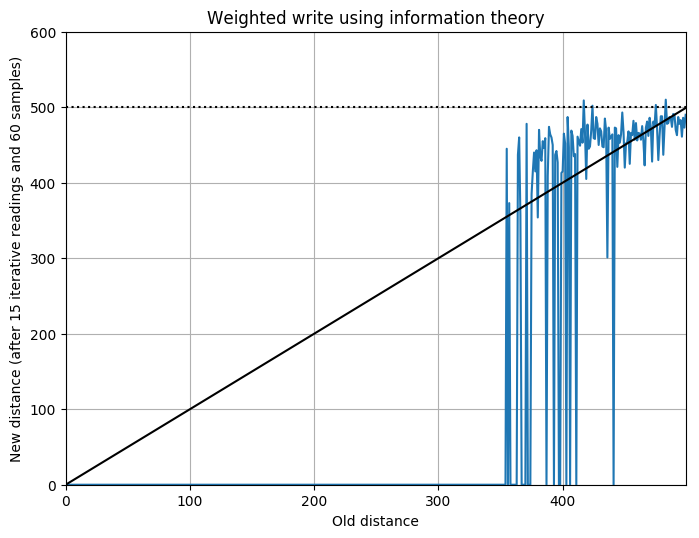

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, distances)
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Weighted write using information theory')
plt.ylabel('New distance (after 15 iterative readings and 60 samples)')
plt.xlabel('Old distance')
plt.grid()
plt.axis([x[0], x[-1], 0, 600]);

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, distances)
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Weighted write using information theory')
plt.ylabel('New distance (after 15 iterative reads)')
plt.xlabel('Old distance')
plt.grid()
plt.axis([0, 1000, 0, 1000]);

In [ ]:
c = sdmlib.Bitstring.init_from_bitstring(b)
c.flip_random_bits(1000)
d = c
print 0, b.distance_to(d)
for i in xrange(10):
    d = sdm.read(d)
    print i+1, b.distance_to(d)